# DLSP25U: Introduction to Deep Learning

**Name:** Sara Vargas



**Instructions:**

In this notebook, you will be asked to write code and answer questions.  
Place all responses under the **Solution** headers.

---

This third assignment is aimed at coding the multiclass soft perceptron algorithm. 
Hereafter we import some useful libraries and set the random seed for reproducibility.

In [122]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

SEED = 0
np.random.seed(SEED)

## The Soft Perceptron (multi-class)

In the previous assignment, we introduced the soft perceptron algorithm for binary classification and in the one before that, we introduced the perceptron algorithm for binary and multi-class classification. In this assignment, we will introduce the soft perceptron algorithm for multi-class classification.

Recall that, given an input feature vector $\boldsymbol{f}(x) \in \mathbb{R}^d$, the multi-class perceptron algorithm **prediction** was defined as:
$$
\begin{align*}
\boldsymbol{s} &= \begin{pmatrix}
w_1^{\top} \boldsymbol{f}(x) \\
w_2^{\top} \boldsymbol{f}(x) \\
\vdots \\
w_K^{\top} \boldsymbol{f}(x)
\end{pmatrix}
\end{align*}
$$
where $w_k \in \mathbb{R}^d$ is the weight vector for class $k$. Then, to **decide** the class label, we would choose the class with the highest score:
$$
\begin{align*}
% \hat{y} &: \mathbb{R}^d \rightarrow \{1, 2, \ldots, K\} \\
\hat{y} &= \arg\max_{k} \boldsymbol{s}_k
\end{align*}
$$
----



This time, for the soft perceptron algorithm, we will introduce the **soft-argmax** function, often referred to as the softmax function. The softargmax function is defined as:
$$
\begin{align*}
\text{softargmax} &: \mathbb{R}^K \rightarrow \left( 0, 1 \right)^K \\
\text{softargmax}(\boldsymbol{s}) &= \frac{1}{\sum_{k=1}^{K}\exp(s_k)} \begin{pmatrix}
\exp(s_1) \\
\exp(s_2) \\
\vdots \\
\exp(s_K)
\end{pmatrix}
\end{align*}
$$

This function takes in input a $K$-dimensional vector of real numbers and outputs a $K$-dimensional vector of real numbers in the range $[0, 1]$ that **sum up to 1**. This enable us to interpret the output as a probability distribution over the $K$ classes. Moreover, the softargmax function can be parametrized by a coldness (or inverse temperature) parameter $\beta$:
$$
\begin{align*}
\text{softargmax} &: \mathbb{R}^K \rightarrow \left( 0, 1 \right)^K \\
\text{softargmax}_{}(\boldsymbol{s}) &= \frac{1}{\sum_{k=1}^{K}\exp(\beta s_k)} \begin{pmatrix}
\exp(\beta s_1) \\
\exp(\beta s_2) \\
\vdots \\
\exp(\beta s_K)
\end{pmatrix}
\end{align*}
$$

In this notebook we will always consider $\beta = 1$.

---

Having seen so, given a feature vector $\boldsymbol{f}(x) \in \mathbb{R}^d$, the multi-class soft perceptron algorithm **prediction** is defined as:
$$
\begin{align*}
\tilde{\boldsymbol{y}} &: \mathbb{R}^d \rightarrow \left( 0, 1 \right)^K \\
\tilde{\boldsymbol{y}} &= \text{softargmax} \left( \begin{pmatrix}
\boldsymbol{w}_1^{\top} \boldsymbol{f}(x) \\
\boldsymbol{w}_2^{\top} \boldsymbol{f}(x) \\
\vdots \\
\boldsymbol{w}_K^{\top} \boldsymbol{f}(x)
\end{pmatrix} \right)
\end{align*}
$$
where $\boldsymbol{w}_k \in \mathbb{R}^d$ is the weight vector for class $k$.

Then, to **decide** the class label, we would choose the class with the highest probability:
$$
\begin{align*}
\hat{y} &: \mathbb{R}^d \rightarrow \{1, 2, \ldots, K\} \\
\hat{y} &= \arg\max_{k} \tilde{y}_k
\end{align*}
$$

---

The last ingredient we need to introduce is the loss function. In the last assignment, we introduced the **binary cross-entropy loss**. In this assignment, we will introduce the **cross-entropy loss**, which is a generalization of the binary cross-entropy loss to the multi-class case.

First, we now that the total loss function is defined as the average of the per-sample loss function:
$$
\mathcal{L}(\boldsymbol{w}, \mathcal{D}) = \frac{1}{N} \sum_{n=1}^{N} L(\boldsymbol{w}, x_n, y_n)
$$
and this remains true.

Second, we need to define the per-sample loss function. In the binary case, we defined the per-sample loss function as:
$$
L(\boldsymbol{w}, x, y) = -y \log(\sigma[\boldsymbol{w}^{\top} \boldsymbol{f}(x)]) - (1 - y) \log(1 - \sigma[\boldsymbol{w}^{\top} \boldsymbol{f}(x)])
$$
where $\sigma$ is the sigmoid function. Notice that this is the average over the two possible classes $y = 0$ and $y = 1$.
Now, the classes we have to consider are $K$ and the per-sample loss function is defined as:
$$
\begin{align*}
L(\boldsymbol{w}, x, y) &=  - \log \left( \boldsymbol{y}^{\top} \tilde{\boldsymbol{y}} \right) \\
&= - \log \left( \tilde{\boldsymbol{y}}_{y} \right) \\
&= - \log \left( \text{softargmax} \left( \boldsymbol{w}^{\top} \boldsymbol{f}(x) \right)_{y} \right) \\
&= - \log \left( \frac{\exp( \boldsymbol{w}_{y}^{\top} \boldsymbol{f}(x))}{\sum_{k=1}^{K} \exp(\boldsymbol{w}_k^{\top} \boldsymbol{f}(x))} \right) \\
&= -  \boldsymbol{w}_y^{\top} \boldsymbol{f}(x) + \log \left( \sum_{k=1}^{K} \exp(\boldsymbol{w}_k^{\top} \boldsymbol{f}(x)) \right)
\end{align*}
$$
where $\boldsymbol{y} = \text{one-hot}_K(y)$ is the one-hot encoded vector of the class label, $y$ is the true class label and we use the $\boldsymbol{w}_y$ notation to denote the weight vector of the correct class label.

---

The last thing we need is the update rule. We know that in general, the update rule is defined as:
$$
\boldsymbol{W} \leftarrow \boldsymbol{W} - \nabla_{\boldsymbol{W}} \mathcal{L}(\boldsymbol{W}, \mathcal{D})
$$

Therefore we now explicitly compute the gradient of the loss function with respect to the weight matrix $W$:
$$
\begin{align*}
\nabla_{\boldsymbol{W}} \mathcal{L}(\boldsymbol{W}, \mathcal{D}) &= \frac{1}{N} \sum_{n=1}^{N} \nabla_{\boldsymbol{W}} L(\boldsymbol{W}, x_n, y_n) \\
\nabla_{\boldsymbol{W}} L(\boldsymbol{W}, x, y) &= \begin{pmatrix}
\nabla_{\boldsymbol{w}_1} L(\boldsymbol{w}_1, x, y) \\
\nabla_{\boldsymbol{w}_2} L(\boldsymbol{w}_2, x, y) \\
\vdots \\
\nabla_{\boldsymbol{w}_k} L(\boldsymbol{w}_k, x, y)
\end{pmatrix}  = \begin{pmatrix}
0 \\
\vdots \\
\nabla_{\boldsymbol{w}_y} \boldsymbol{w}_y^{\top} \boldsymbol{f}(x) \\
\vdots \\
0
\end{pmatrix} + \text{softargmax} \left( \boldsymbol{W}^{\top} \boldsymbol{f}(x) \right) \boldsymbol{f}^{\top}(x) \\
\nabla_{\boldsymbol{W}} L(\boldsymbol{W}, x, y) &= - \boldsymbol{y}\boldsymbol{f}^\top(x) + \text{softargmax} \left( \boldsymbol{W}^{\top} \boldsymbol{f}(x) \right) \boldsymbol{f}^\top(x)
\end{align*}
$$


We encourage you to try deriving this result yourself. Check out the [Matrix Cookbook](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf) for help with differentiating vectors and matrices.

Therefore we have that the update rule is:
$$
\begin{align*}
\boldsymbol{W} &\leftarrow \boldsymbol{W} - \nabla_{\boldsymbol{W}} \mathcal{L}(\boldsymbol{W}, \mathcal{D}) \\
\boldsymbol{W} &\leftarrow \boldsymbol{W} + \left( \boldsymbol{y} - \tilde{\boldsymbol{y}} \right) \boldsymbol{f}(x)^{\top}
\end{align*}
$$

where $\tilde{\boldsymbol{y}} = \text{softargmax} \left( \boldsymbol{W}^{\top} \boldsymbol{f}(x) \right)$.

### Exercise 1

The first exercise requires you to implement the multi-class soft perceptron algorithm using a Python class. Below is a template for the `MulticlassSoftPerceptron` class. You need to implement the methods `train`, `predict`, and `decide`:

- The `train` method should implement the perceptron learning algorithm. It should take as input both the training data and the number of epochs to train for.
- The `predict` method should take a data point `f` as input and return the vector of probabilities $\tilde{\boldsymbol{y}}$.
- The `decide` method should take a data point `f` as input and return the predicted class label $\hat{y}$.

**Useful functions:**
- `numpy.outer`

In [241]:
class MulticlassSoftPerceptron:

    @staticmethod
    def softargmax(s):
        exp_s= np.exp(s)
        return exp_s / np.sum(exp_s)
        
    def __init__(self, n_features, n_classes):
        # Save the input parameters
        self.n_classes = n_classes
        self.n_features = n_features

        # Build the model parameters
        self.W = np.zeros((n_features,n_classes))
        self.b = np.zeros(n_classes)

    def train(self, F, y, epochs):
        for e in range(epochs): 
            for i, f in enumerate(F): 
                y_hat=self.decide(f)  #predicted argmax
                target= y[i]    
                
                onehot_y= np.zeros(self.n_classes) ##one hot is as big as number of classes
                onehot_y[target]= 1
                y_tilda= self.predict(f)
                diff= onehot_y - y_tilda
                lam = 1

                self.W+=  lam*(np.outer(f,diff))
                self.b+= lam * (onehot_y - y_tilda)

    
    def predict(self, f):
        s= self.W.T@f + self.b 
        return self.softargmax(s)
        
    def decide(self, f):
        y_hat_label= np.argmax(self.predict(f)) 
        return y_hat_label
    


### Exercise 2

The second exercise requires you to implement the cross-entropy loss function. Below is a template for the `cross_entropy_loss` function.

In [242]:
def cross_entropy_loss(y_true, y_pred):
    onehot_y= np.zeros_like(y_pred)
    onehot_y[y_true]= 1
    return -np.log(np.dot(onehot_y, y_pred))
    

### Exercise 3

Now you can put in practice the `SoftPerceptron` class and the `cross_entropy_loss` function you implemented in the previous exercises.

1. Load the Iris dataset
2. Split the dataset into training and test sets
3. Train the `SoftPerceptron` model on the training set
4. Evaluate the loss and accuracy on both the training and test sets

In [243]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train,y_test= train_test_split(X, y, test_size=0.2)

k_classes= len(set(y_test))
n_features= len(X_train[0])
msf= MulticlassSoftPerceptron(n_features, k_classes) ##why cant it be k classes? like i get that then k classes makeds weights be 

#train : 
msf.train(X_train, y_train, 100)

def totalLoss(msf, X, y): 
    return np.mean([cross_entropy_loss(y[i], msf.predict(X[i])) for i in range(len(y))])

#ACCURACY: 
y_pred_test = np.array([msf.decide(f) for f in X_test])
accuracy = np.mean(y_pred_test == y_test)
print(f'The accuracy of the test set: {accuracy}')
y_pred_train = np.array([msf.decide(f) for f in X_train])
accuracy = np.mean(y_pred_train == y_train)
print(f'The accuracy of the training set: {accuracy}')

#LOSS: 
test_cross_entropy= totalLoss(msf, X_test, y_test)
train_cross_entropy= totalLoss(msf, X_train, y_train)
print(f'Cross entropy loss for test: {test_cross_entropy}')
print(f'Cross entropy loss for train: {train_cross_entropy}')




The accuracy of the test set: 0.9333333333333333
The accuracy of the training set: 0.9833333333333333
Cross entropy loss for test: 2.260610262120332
Cross entropy loss for train: 0.2774494957685928


### Exercise 4

Now, we would like to visualize the decision boundaries of the trained model. Since the Iris dataset has four features, we cannot directly visualize the decision boundaries in the full input space. However, for the purpose of this exercise, you are asked to use only the following two features:

- Petal length (cm)
- Petal width (cm)

It is important to note that, in practice, this approach must always be avoided, as it discards valuable information. However, for the sake of this exercise, we will proceed with this simplification.

### Instructions

1. Remove the other two features from the dataset.
2. Train the `MultiClassSoftPerceptron` model on the reduced dataset.
3. Compute the loss on both the training and test sets.
4. Visualize the decision boundaries.
5. Draw the equi-probability curves inside each decision region for the probabilities $0.99$ and $0.999$.
6. Answer the following questions:
   - Which equi-probability curve is closer to the decision boundary?
   - What is the value of $\tilde{\boldsymbol{y}}$ at the point where all the decision boundaries intersect?

Cross entropy loss for test: 26.71569581506795
Cross entropy loss for train: 33.19166227293261


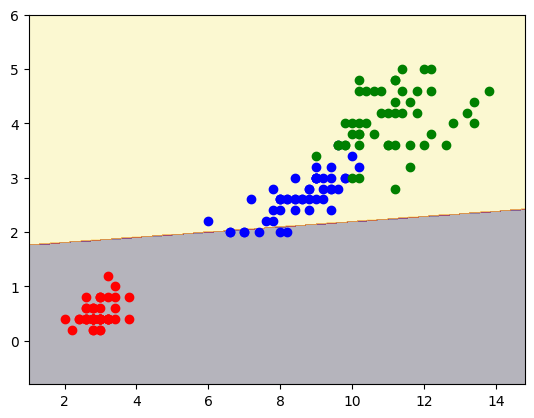

In [248]:
iris = load_iris()
X = iris.data
y = iris.target
X= X[:, 2:4]  #extract the last 2 columns
for x in X:
    x *= 2
X_train, X_test, y_train,y_test= train_test_split(X, y, test_size=0.2)


k_classes= len(set(y_test))
n_features= len(X_train[0])

m= MulticlassSoftPerceptron(n_features, k_classes)
#TRAIN: 
m.train(X_train, y_train, 50)

#LOSS: 
test_cross_entropy= totalLoss(m, X_test, y_test)
train_cross_entropy= totalLoss(m, X_train, y_train)
print(f'Cross entropy loss for test: {test_cross_entropy}')
print(f'Cross entropy loss for train: {train_cross_entropy}')

#make grid
xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
xlin= np.linspace(xmin, xmax, 500)
ylin= np.linspace(ymin, ymax, 500)
xx, yy= np.meshgrid(xlin, ylin )
Z= np.zeros(xx.shape, dtype=int)

for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        f= [xx[i,j], yy[i,j]]
        Z[i,j]=m.decide(np.array(f))

contours= plt.contourf(xx, yy, Z, cmap='inferno', alpha=0.3)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label="Class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label="Class 1")
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color='green', label="Class 2")



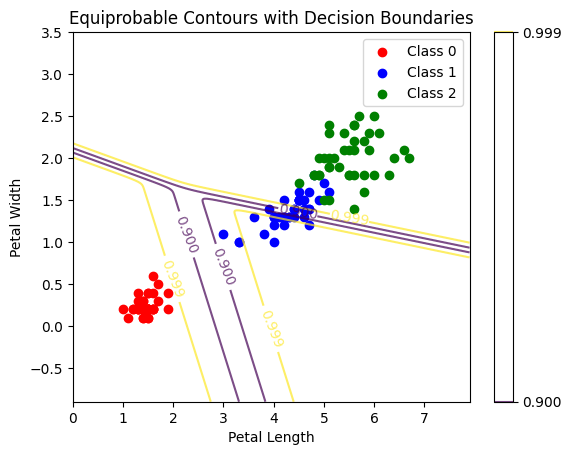

In [226]:
xmin, xmax = X[:, 0].min() - 1, X[:, 0].max() + 1
ymin, ymax = X[:, 1].min() - 1, X[:, 1].max() + 1
xlin = np.linspace(xmin, xmax, 500)
ylin = np.linspace(ymin, ymax, 500)
xx, yy = np.meshgrid(xlin, ylin)
Z = np.zeros(xx.shape)

for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        f = np.array([xx[i, j], yy[i, j]])
        prob = m.predict(f) 
        Z[i, j] = np.max(prob)  

levels = np.linspace(0.9, 0.999, 2)  

contours = plt.contour(xx, yy, Z, levels=levels, cmap='viridis', alpha=0.7)

plt.clabel(contours, inline=True, fontsize=10, fmt="%.3f")

plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label="Class 0")
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label="Class 1")
plt.scatter(X_train[y_train == 2][:, 0], X_train[y_train == 2][:, 1], color='green', label="Class 2")
plt.title("Equiprobable Contours with Decision Boundaries")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.colorbar(contours)
plt.legend()
plt.show()

**Which equi-probability curve is closer to the decision boundary?**
The equiprobability curve closer to 0.5 is closer to the boundary since the closer to the boundary the more indifferent between the two classes we are. So the vector ytilda approaches (0, 0.5, 0.5) between two classes. 
**What is the value of at the point where all the decision boundaries intersect?**
At the intersection point we see there is an equiprobability value of ytilda of (0.33, 0.33, 0.33) since there is an equiprobability between the 3 classes. We see this intersection in the previous graph wehre the boundaries for the 3 classes are shown at the boundary of the different colors for each class. 